In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load and Preprocess Data

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_family_hist,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,sex,remote_flag,tech_flag
0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,5.0,1.0,...,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1
1,0.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,...,2.0,2.0,2.0,1.0,1.0,3.0,4.0,0.0,1.0,1
2,0.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
3,1.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,0.0,...,1.0,2.0,2.0,1.0,1.0,4.0,4.0,0.0,2.0,0
4,0.0,4.0,0.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,1.0,1.0,4.0,4.0,1.0,2.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   self_empl_flag                   1235 non-null   float64
 1   comp_no_empl                     1235 non-null   float64
 2   tech_comp_flag                   1235 non-null   float64
 3   mh_coverage_flag                 1235 non-null   float64
 4   mh_coverage_awareness_flag       1235 non-null   float64
 5   mh_employer_discussion           1235 non-null   float64
 6   mh_resources_provided            1235 non-null   float64
 7   mh_anonimity_flag                1235 non-null   float64
 8   mh_medical_leave                 1235 non-null   float64
 9   mh_discussion_neg_impact         1235 non-null   float64
 10  ph_discussion_neg_impact         1235 non-null   float64
 11  mh_discussion_cowork             1235 non-null   float64
 12  mh_discussion_superv

In [6]:
X=df.drop('mh_disorder_current', axis=1)

In [7]:
y=df['mh_disorder_current']

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

# Model Training

To calculate confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

def train_scores(model, model_name, n_classes, proba=True):
    pred = model.predict(x_train)
    print('****** For Training on ', model_name, 'Model ******\n')
    
    # Print confusion matrix
    print('The Confusion Matrix:\n', confusion_matrix(y_train, pred))
    
    # Print accuracy score
    acc_score = accuracy_score(y_train, pred)
    print('\n The Accuray Score:', acc_score)
    
    # Print recall score
    recall = recall_score(y_train==2, pred==2)
    print('\n The Recall Score:', recall)
    
    # Print precision score
    precision = precision_score(y_train==2, pred==2)
    print('\n The Precision Score:', precision)
    
    # Print F1 score
    f1 = f1_score(y_train==2, pred==2)
    print('\n The F1 Score:', f1)
    
    # Compute and print ROC AUC score for multiclass classification
    y_train_binarized = label_binarize(y_train, classes=range(n_classes))
    y_pred_binarized = label_binarize(pred, classes=range(n_classes))
    roc_auc = roc_auc_score(y_train_binarized, y_pred_binarized, multi_class='ovr')
    print('\n The ROC AUC Score:', roc_auc)


    if(proba==False):
        return
    y_pred_prob=model.predict_proba(x_train)

    fpr = {}
    tpr = {}
    thresholds = {}
    roc_auc = {}
    for i in range(y_pred_prob.shape[1]):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_train, y_pred_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # plot ROC curve for each class
    plt.figure()
    for i in range(y_pred_prob.shape[1]):
        plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:0.2f})'.format(i, roc_auc[i]))

    # plot the random guessing line
    plt.plot([0, 1], [0, 1], 'k--')

    # format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [10]:
def test_scores(model, model_name, n_classes, proba=True):
    pred = model.predict(x_test)
    print('****** For Testing on', model_name, 'Model ******\n')
    
    # Print confusion matrix
    print('The Confusion Matrix:\n', confusion_matrix(y_test, pred))
    
    # Print accuracy score
    acc_score = accuracy_score(y_test, pred)
    print('\n The Accuray Score:', acc_score)
    
    # Print recall score
    recall = recall_score(y_test==2, pred==2)
    print('\n The Recall Score:', recall)
    
    # Print precision score
    precision = precision_score(y_test==2, pred==2)
    print('\n The Precision Score:', precision)
    
    # Print F1 score
    f1 = f1_score(y_test==2, pred==2)
    print('\n The F1 Score:', f1)
    
    # Compute and print ROC AUC score for multiclass classification
    y_test_binarized = label_binarize(y_test, classes=range(n_classes))
    y_pred_binarized = label_binarize(pred, classes=range(n_classes))
    roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, multi_class='ovr')
    print('\n The ROC AUC Score:', roc_auc)


    if(proba==False):
        return
    y_pred_prob=model.predict_proba(x_test)

    fpr = {}
    tpr = {}
    thresholds = {}
    roc_auc = {}
    for i in range(y_pred_prob.shape[1]):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # plot ROC curve for each class
    plt.figure()
    for i in range(y_pred_prob.shape[1]):
        plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:0.2f})'.format(i, roc_auc[i]))

    # plot the random guessing line
    plt.plot([0, 1], [0, 1], 'k--')

    # format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



# Logistic Regression

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
param_dist = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

# Create a random forest classifier
rf = LogisticRegression(max_iter=10000)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_iter=5,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']})

****** For Training on  Logistic Regression Model ******

The Confusion Matrix:
 [[ 91  53  69]
 [ 25 283  48]
 [ 16  23 380]]

 The Accuray Score: 0.7631578947368421

 The Recall Score: 0.9069212410501193

 The Precision Score: 0.7645875251509054

 The F1 Score: 0.8296943231441049

 The ROC AUC Score: 0.7917191360463433


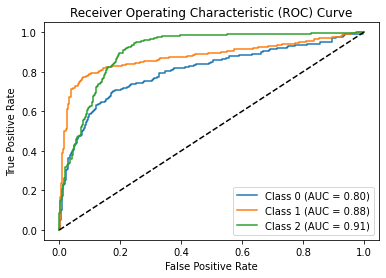

In [15]:
train_scores(rand_search,'Logistic Regression',3)

****** For Testing on Logistic Regression Model ******

The Confusion Matrix:
 [[23 14 23]
 [ 0 66 13]
 [ 6  9 93]]

 The Accuray Score: 0.7368421052631579

 The Recall Score: 0.8611111111111112

 The Precision Score: 0.7209302325581395

 The F1 Score: 0.7848101265822784

 The ROC AUC Score: 0.775317392210274


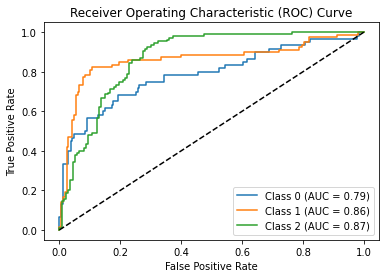

In [16]:
test_scores(rand_search,'Logistic Regression',3)

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
param_dist = {'n_estimators': range(1,100),
              'max_depth': range(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': range(1, 20),
                                        'n_estimators': range(1, 100)})

In [31]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'n_estimators': 45, 'max_depth': 7}


****** For Training on  Random Forest Model ******

The Confusion Matrix:
 [[131  21  61]
 [  5 308  43]
 [  4   3 412]]

 The Accuray Score: 0.861336032388664

 The Recall Score: 0.9832935560859188

 The Precision Score: 0.7984496124031008

 The F1 Score: 0.8812834224598929

 The ROC AUC Score: 0.87185353023568


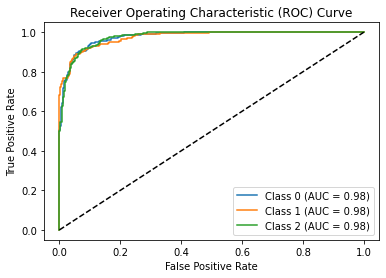

In [32]:
train_scores(best_rf,'Random Forest',3)

****** For Testing on Random Forest Model ******

The Confusion Matrix:
 [[ 23  11  26]
 [  1  64  14]
 [  2   2 104]]

 The Accuray Score: 0.7732793522267206

 The Recall Score: 0.9629629629629629

 The Precision Score: 0.7222222222222222

 The F1 Score: 0.8253968253968254

 The ROC AUC Score: 0.7958715602120833


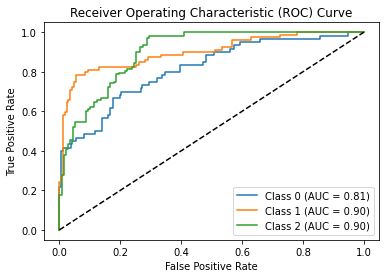

In [33]:
test_scores(best_rf,'Random Forest',3)

# Support Vector Classifier

In [34]:
from sklearn.svm import SVC

In [39]:
param_dist = {'kernel': [ 'poly', 'rbf', 'linear', 'sigmoid']}
# ,, 
# Create a random forest classifier
model = SVC()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(model,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)


e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'kernel': ['poly', 'rbf', 'linear',
                                                   'sigmoid']})

In [40]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'kernel': 'rbf'}


In [41]:
train_scores(best_rf,'SVC',3, proba=False)

****** For Training on  SVC Model ******

The Confusion Matrix:
 [[110  33  70]
 [ 22 281  53]
 [ 15   4 400]]

 The Accuray Score: 0.8006072874493927

 The Recall Score: 0.954653937947494

 The Precision Score: 0.7648183556405354

 The F1 Score: 0.8492569002123143

 The ROC AUC Score: 0.8229927915329935


In [42]:
test_scores(best_rf,'SVC',3, proba=False)

****** For Testing on SVC Model ******

The Confusion Matrix:
 [[24 12 24]
 [ 1 63 15]
 [ 5  4 99]]

 The Accuray Score: 0.7530364372469636

 The Recall Score: 0.9166666666666666

 The Precision Score: 0.717391304347826

 The F1 Score: 0.8048780487804877

 The ROC AUC Score: 0.7843726374655465


# Gradient Boosting Machines

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer


In [44]:
scoring = {'accuracy': make_scorer(accuracy_score)}


param_grid= {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth":[3,5,8],
    "n_estimators":[10]
    }
model = GradientBoostingClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(model,
                                 param_distributions=param_dist,
                                 scoring=scoring,
                                 refit=False,
                                 cv=2, 
                                 n_jobs=-1)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)


e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [19]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


****** For Training on  Gradient Boosting Classifier Model ******

The Confusion Matrix:
 [[ 91  53  69]
 [ 25 283  48]
 [ 16  23 380]]

 The Accuray Score: 0.7631578947368421

 The Recall Score: 0.9069212410501193

 The Precision Score: 0.7645875251509054

 The F1 Score: 0.8296943231441049

 The ROC AUC Score: 0.7917191360463433


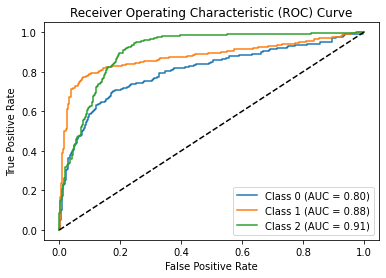

In [20]:
train_scores(best_rf,'Gradient Boosting Classifier',3)

****** For Testing on Gradient Boosting Classifier Model ******

The Confusion Matrix:
 [[23 14 23]
 [ 0 66 13]
 [ 6  9 93]]

 The Accuray Score: 0.7368421052631579

 The Recall Score: 0.8611111111111112

 The Precision Score: 0.7209302325581395

 The F1 Score: 0.7848101265822784

 The ROC AUC Score: 0.775317392210274


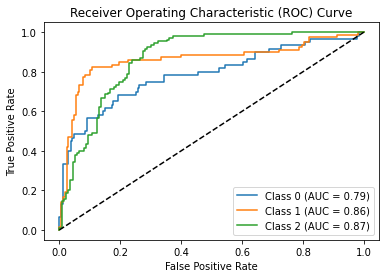

In [21]:
test_scores(best_rf,'Gradient Boosting Classifier',3)

# Neural Networks

In [23]:
from sklearn.neural_network import MLPClassifier


In [24]:
param_grid = {
    'hidden_layer_sizes': [(10,), (100,), (10,10,), (50,50,), (100,100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# initialize the neural network model
nn = MLPClassifier()

# perform grid search cross validation
grid = RandomizedSearchCV(nn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(10,), (100,),
                                                               (10, 10),
                                                               (50, 50),
                                                               (100, 100)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   scoring='accuracy', verbose=1)

In [25]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


****** For Training on  Neural Networks Model ******

The Confusion Matrix:
 [[ 91  53  69]
 [ 25 283  48]
 [ 16  23 380]]

 The Accuray Score: 0.7631578947368421

 The Recall Score: 0.9069212410501193

 The Precision Score: 0.7645875251509054

 The F1 Score: 0.8296943231441049

 The ROC AUC Score: 0.7917191360463433


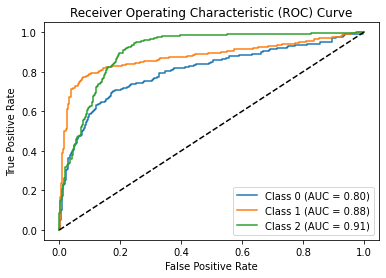

In [26]:
train_scores(best_rf,'Neural Networks',3)

****** For Testing on Neural Networks Model ******

The Confusion Matrix:
 [[23 14 23]
 [ 0 66 13]
 [ 6  9 93]]

 The Accuray Score: 0.7368421052631579

 The Recall Score: 0.8611111111111112

 The Precision Score: 0.7209302325581395

 The F1 Score: 0.7848101265822784

 The ROC AUC Score: 0.775317392210274


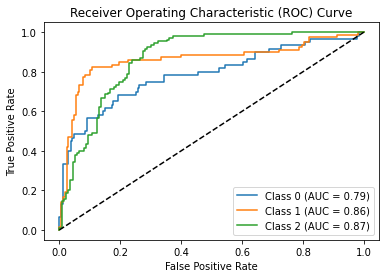

In [27]:
test_scores(best_rf,'Neural Networks',3)